# Chrystal Mingo
# CSC 217 Final Project
## The World's Population

## Introduction:


For my project, I will be explore the World's population, looking into how it has grown over the decades since 1500 to 2018. I will be looking into another category to gather information about the world population in regards to which cities are the most densely populated and over all identify which parts of the world most of the population resides in.

I will be analyzing the growth of the world's population by using statistics to identify any correlations between the decades since 1500 to 2018 to identify a line of best fit that helps serve as a visual of how the world's population is growing and to hopefully predict the future growth rate. Hypothesis testing will be done to identify which areas such as the 10 largest cities in the world are the most densely populated. Last but not least I will end with a visual representation of where most of the population resides.

The data that I will be using is pulled from a Wikipedia article called "Demographics of the World", located [here]('https://en.wikipedia.org/wiki/Demographics_of_the_world'). 

First I'll import the necessary packages down, along with my data and the tables I shall be using for this project.

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

Note that this dataset has 16 tables, I shall only be using 3 tables specifically {0,1,2}

In [286]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_the_world')
print(len(tables))


16


## Table 1: The World Population Growth

#### Brief overview of content in Table 1:

- Central Tendencies
- Measure of Spread
- Vizualization
- Regression

This is how I call the first table focusing on the World's population growth since 1500 to 2018.

In [287]:
df_1 = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_the_world', header=1)[0]

The data is shown below where year goes from 1500 - 2018 and million represents the population  (in millions) during those years.

In [288]:
df_1

,Year,Million
0,1500,458
1,1600,580
2,1700,682
3,1750,791
4,1800,978
5,1850,1262
6,1900,1650
7,1950,2521
8,1999,5978
9,2008,6707


The world's population was at its highest compared to the past years in 2018, with a population of 7.6 billion people.

In [289]:
df_1[df_1['Year'] == np.max(df_1['Year'])]

,Year,Million
12,2018,7600


The world's population in 1500s was the lowest compared to the years thereafter, with a population of 458 million people.

In [290]:
df_1[df_1['Year'] == np.min(df_1['Year'])] #1500 has the lowest

,Year,Million
0,1500,458


The world's population from 1500 to 2018 has increased by 7.142 billion. 

In [291]:
np.max(df_1['Million'])-np.min(df_1['Million'])

7142

The mean of the world's population is approximately 3.35billion while the variance is much higher than the mean with a variance of 8371343 million. Having such a large variance means that most of the data is not residing close to the mean, it is spread further from it for a matter of fact. Overall this helps to showcase that the mean isn't a good representation of the average population over the decades from 1500 to 2018.

In [292]:
np.mean(df_1['Million'])

3350.5384615384614

In [293]:
#Varience
np.var(df_1['Million'])

8371343.633136095

The boxplot helps to showcase the median (Q2), also the min and max of the world population, in addition to the Q1, and Q3, from which the Interquartile Range can be found. 

- The median of the world's population is 1.65 billion, the first quartile is 791 million, the third quartile is 6.7 billion. The Interquatile range of the world's population is 5.9 billion.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2091e710>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2091ed30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2091e2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20927400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a20927748>],
 'means': []}

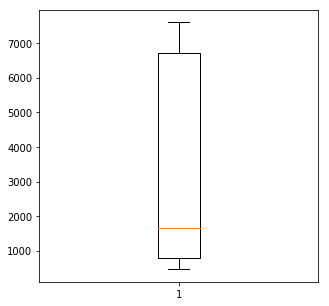

In [294]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df_1['Million'])

In [295]:
#The First Quartile 
np.percentile(df_1['Million'], q=25) 

791.0

In [296]:
#The Second Quartile/Median
np.percentile(df_1['Million'], q=50) 

1650.0

In [297]:
#The Third Quartile
np.percentile(df_1['Million'], q=75) 

6707.0

In [298]:
#Interquartile Range
np.percentile(df_1['Million'], q=75) - np.percentile(df_1['Million'], q=25)

5916.0

This bar graph gives a visual of how the population has increased from 1500 to 2018

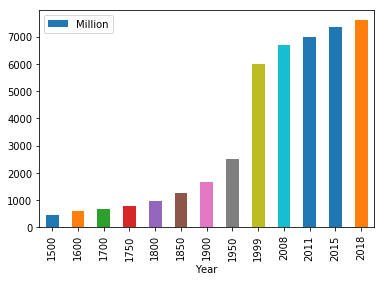

In [299]:
df_1.plot.bar(x='Year', y='Million')

### Correlation between the Decades and World Population

Now I want to focus on finding a correlation between the population over the decades to find an appropriate equation and line of best fit that can be used to approximate the population at any given year.

#### Scatter Plot of the World's Population Growth

Text(0, 0.5, 'Population in Millions')

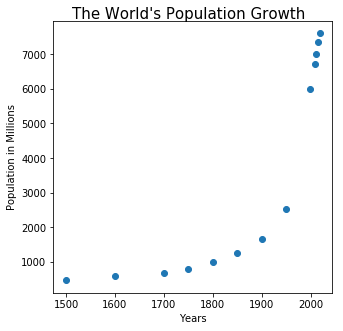

In [300]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_1['Year'], df_1['Million'])
fig.suptitle("The World's Population Growth" , fontsize=15, y=0.92)
plt.xlabel('Years')
plt.ylabel('Population in Millions')

The function below helps me gather information such as the slope, intercept, predictions, and residuals of the data.

In [301]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [302]:
slope_pop, intercept_pop, predictions_pop, residuals_pop = evaluate_linear_relationship(df_1['Year'], (df_1['Million']))

Below is the line of best fit for the World's Population growth looking at the relationship between the years and population in millions. From the result of the line of best fit we reach the conclusion that it does not efficiently work to show the correlation between the two variables because it is a non-linear graph.

Text(0, 0.5, 'Population in Millions')

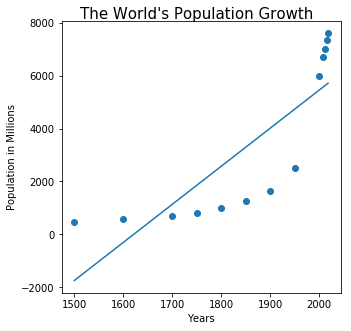

In [303]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_1['Year'], df_1['Million'])
sorted_order = np.argsort(df_1['Million'])
plt.plot(df_1['Year'][sorted_order], predictions_pop[sorted_order])
fig.suptitle("The World's Population Growth", fontsize=15, y=0.92)
plt.xlabel('Years')
plt.ylabel('Population in Millions')

The residual also does not look like it has any random points but much rather has a pattern, which makes the data less useful for the correaltion test.

Text(0.5, 0.92, 'Residuals')

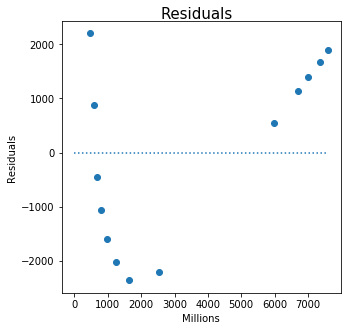

In [304]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_1['Million'], residuals_pop)
plt.plot([0, df_1['Million'][len(df_1) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Millions')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

To try and get the data to be more in a linear structure and to find the line of best fit I took the log of the world's population:

Text(0, 0.5, 'Population in Millions (logged)')

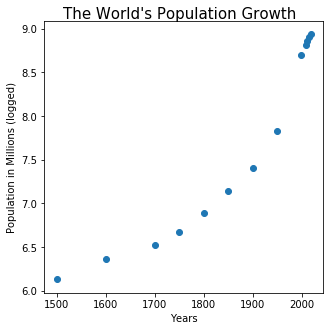

In [305]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_1['Year'], np.log(df_1['Million']))
fig.suptitle("The World's Population Growth" , fontsize=15, y=0.92)
plt.xlabel('Years')
plt.ylabel('Population in Millions (logged)')

In [306]:
slope_pop, intercept_pop, predictions_pop, residuals_pop = evaluate_linear_relationship(df_1['Year'], np.log(df_1['Million']))

The line of best fit for the relationship between the Years and Population of the World (Logged)

Even after doing the log of the World's Population in millions the line of best fit is still too far away from the points, which would lead to an inaccurate slope representation of decades and their population estimated.

Text(0, 0.5, 'Population in Millions (logged)')

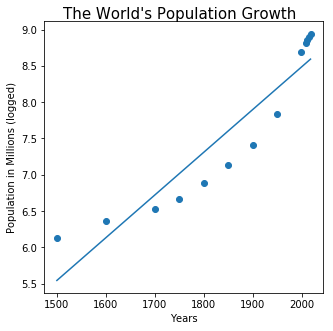

In [307]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_1['Year'], np.log(df_1['Million']))
sorted_order = np.argsort(df_1['Year'])
plt.plot(df_1['Year'][sorted_order], predictions_pop[sorted_order])
fig.suptitle("The World's Population Growth" , fontsize=15, y=0.92)
plt.xlabel('Years')
plt.ylabel('Population in Millions (logged)')

The resdidual continues to follow a pattern, which means it does not look random, and makes the data less useful for the correaltion test.

Text(0, 0.5, 'Population in Millions (logged)')

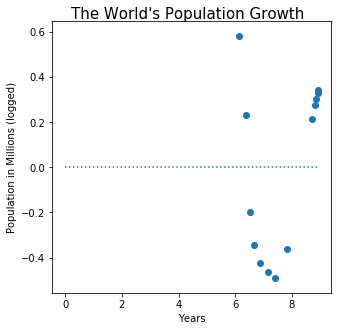

In [308]:
fig = plt.figure(figsize=(5,5))
plt.scatter(np.log(df_1['Million']), residuals_pop)
plt.plot([0, np.log(df_1['Million'])[len(df_1) - 1]], [0,0], linestyle='dotted')
fig.suptitle("The World's Population Growth" , fontsize=15, y=0.92)
plt.xlabel('Years')
plt.ylabel('Population in Millions (logged)')

In [309]:
#R-Squared Value
np.var(predictions_pop) / np.var(df_1["Million"]) *100

1.1472664341049332e-05

The relationship between the decades from 1500 to 2018 to the world's population is non-linear. There is an R-squared value of 1.5% which means that the line of best fit doesn't truly represent the correlation between the years and population. The residuals plots as well leave a predictive linear model unreliable, since it follows a pattern and is not random. In addition the line of best fit was not appropriate for the regular data nor the logged version of the data.

### Alternate Idea to get line of best fit

Since the regular data nor the logged version was suitable for finding the line of best fit, I want to focus in on the population from 1999-2018.

In [310]:
new_df = df_1[8:13]
new_df

,Year,Million
8,1999,5978
9,2008,6707
10,2011,7000
11,2015,7350
12,2018,7600


In [311]:
new_df = new_df.reset_index(drop=True)

In [312]:
slope_pop, intercept_pop, predictions_pop, residuals_pop = evaluate_linear_relationship(new_df['Year'], (new_df['Million']))

When I focused in on the recent years data ranging from the years 1999-2018 the scatterplot looks quite linear, meaning the line of best fit can be applied.

Text(0, 0.5, 'Population in Millions')

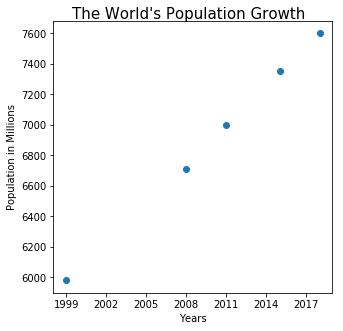

In [313]:
fig = plt.figure(figsize=(5,5))
plt.scatter(new_df['Year'], new_df['Million'])
fig.suptitle("The World's Population Growth" , fontsize=15, y=0.92)
plt.xticks(range(new_df['Year'].min(),new_df['Year'].max(),3))
plt.xlabel('Years')
plt.ylabel('Population in Millions')

The resdiual of the data although few data points are being used, the data is still quite random and does not follow a pattern. 

Residual:

Text(0.5, 0.92, 'Residuals')

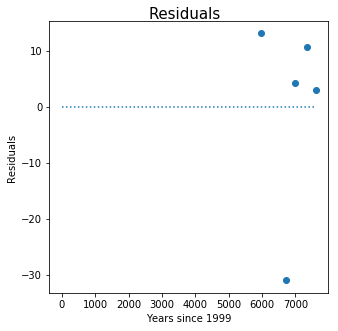

In [314]:
fig = plt.figure(figsize=(5,5))
plt.scatter(new_df['Million'], residuals_pop)
plt.plot([0, new_df['Million'][len(new_df) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Years since 1999')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

#### Line of best fit:

Text(0, 0.5, 'Population in Millions')

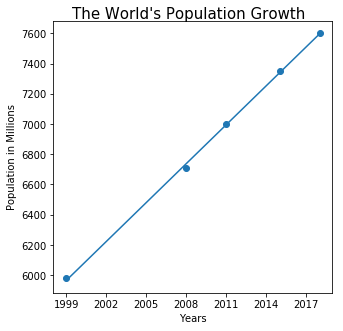

In [315]:
fig = plt.figure(figsize=(5,5))
plt.scatter(new_df['Year'],(new_df['Million']))
sorted_order = np.argsort(new_df['Year'])
plt.plot(new_df['Year'][sorted_order], predictions_pop[sorted_order])
plt.xticks(range(new_df['Year'].min(),new_df['Year'].max(),3))
fig.suptitle("The World's Population Growth" , fontsize=15, y=0.92)
plt.xlabel('Years')
plt.ylabel('Population in Millions')

In [316]:
#R-Squared Value
np.var(predictions_pop) / np.var(new_df["Million"])*100

99.91964461190884

In [317]:
slope_pop

85.89851024208566

In [318]:
intercept_pop

-165746.1852886406

y = mx + b

y = 85.9x -165746.1

The linear equation above is the euation for the line of best fit between the years and the population in millions, it can be used to approximate the population after 1999.

Example:

I found the population for 2017 to be 7.55 billion [here]('https://www.worldometers.info/world-population/') and my model predicted 7.51 billion, although not perfect it is quite close to the actaul population of the world during 2017.

In [319]:
y = slope_pop*(2017) + intercept_pop
y

7511.10986964617

When I focused the data on the relationship between the years from 1999-2018 with the population in millions I found a linear relationship between the variables, as well as an r^2 = 99% meaning that there is a strong correlation between the years and population growth. Now we can use this line of best fit as a predictor of the population's growth thereafter 1999.

## The 10 Largest Cities in the World and their Population


#### Brief overview of content in Table 2:
- Central tendencies of these cities
- Measure of spread
- Hypothesis Testing

Data Table with information regarding the top  major 10 cities of the world showcasing their population, country, area, density, what type of area it is, as well as ranking:

In [320]:
df_2 = tables[1].head(10)
df_2

,0,1,2,3,4,5,6
0,Rank,City,Population,Country,Statistical concept[20],Area (km²)[a],Density (p/km²)
1,1,Tokyo,30000000,Japan,Metropolitan area[b],13500,2716
2,2,Shanghai,24180000,China,Urban agglomeration[c],3920,6168
3,3,Mexico City,22460000,Mexico,Metropolitan area (zona metropolitana),7815,2490
4,4,Delhi,22157000,India,Urban agglomeration[d],33578,659
5,5,Lagos,21000000,Nigeria,Metropolitan area (região metropolitana),10050,3400
6,6,New York City,20153634,United States,Metropolitan Statistics Area,"21,483[21]",938
7,7,Mumbai,20041000,India,Urban agglomeration,"1,097[e]",18268
8,8,Kolkata,15552000,India,Urban agglomeration,"1,026[22]",15158
9,9,Dhaka,14648000,Bangladesh,Metropolitan area (megacity),1600,9155


In [321]:
df_2 = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_the_world', header=0)[1]

In [322]:
df_2.columns

Index(['Rank', 'City', 'Population', 'Country', 'Statistical concept[20]',
       'Area (km²)[a]', 'Density (p/km²)'],
      dtype='object')

India has the highest density, meaning it is the most populated per kilometer.

In [323]:
df_2[df_2['Density (p/km²)'] == np.max(df_2['Density (p/km²)'])] 

,Rank,City,Population,Country,Statistical concept[20],Area (km²)[a],Density (p/km²)
6,7,Mumbai,20041000,India,Urban agglomeration,"1,097[e]",18268


The mean density of the 10 major cities of the world is is 6154.5 p/km^2

In [324]:
np.mean(df_2['Density (p/km²)']) 

6154.5

The standard variance of density of the 10 major cities is 5828.71 p/km^2

In [325]:
np.std(df_2['Density (p/km²)'])

5828.712246285624

### Hypothesis Testing:

- Null Hypothesis:
India has a density equal to the mean density of the population in the 10 largest cities in the world.

- Alternative Hypothesis:
India has a density which is greater than the mean density in the 10 largest cities in the world.  

This is where I set up my normal distribution setting the mean equal to the mean of the density which is 6154.5 p/km^2 and the std equal to the std of the density of the ten major cities in the world, with a significance level of 0.05.

In [326]:
di = stats.norm(6154.5, np.std(df_2['Density (p/km²)']))
di.ppf(0.95) #0.05 significance 

15741.878478759372

Text(0.5, 0.92, 'The Mean Density of the 10 Major Cities in the World')

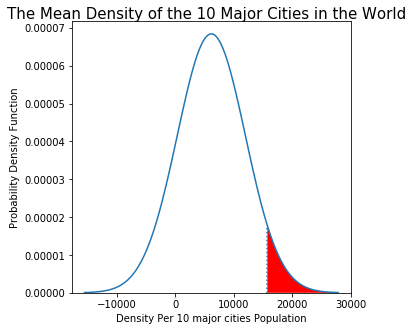

In [327]:
dist = stats.norm(6154.5,5828.712246285624)
fig = plt.figure(figsize=(5,5))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([15741.878478759372, 15741.878478759372],[0, dist.pdf(15741.878478759372)], linestyle='dotted', color='#1f77b4')
plt.ylim(bottom=0)
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('Density Per 10 major cities Population')
plt.ylabel('Probability Density Function')
fig.suptitle('The Mean Density of the 10 Major Cities in the World', fontsize=15, y=0.92)

I reject the null hypothesis because India falls within the rejected region since it is greater than 15741.88 p/km^2 because the density of India is 18268 p/km^2.

## Visual Representation of the World Population (TODAY)

#### Brief overview of content in Table 3:
- Visualizations 

In [328]:
df_3 = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_the_world', header=0)[2][0:7]
df_3

,Region,Number,Percentage
0,Asia,4307107875,60.3%
1,Africa,1037524058,14.5%
2,Europe,742991991,11.4%
3,North America,544620340,7.6%
4,South America,400067694,5.6%
5,Oceania,35426995,0.5%
6,Antarctica,11969,0.00002%


Asia has the highest population which is aproximately 60% of the world's population, with 4.3 billion people living there

In [329]:
df_3[df_3['Number'] == np.max(df_3['Number'])]

,Region,Number,Percentage
0,Asia,4307107875,60.3%


Anarctica has the lowest population which is aproximately 0.00002% of the world's population, with 11969 people living there (most likely researchers)

In [330]:
df_3[df_3['Number'] == np.min(df_3['Number'])]

,Region,Number,Percentage
6,Antarctica,11969,0.00002%


### Bar graph representing the world's population today

Text(0.5, 0.92, 'The population of thw World Today')

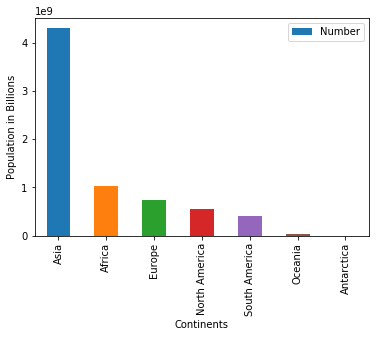

In [331]:
df_3.plot.bar(x='Region', y='Number')
plt.xlabel('Continents')
plt.ylabel('Population in Billions')
fig.suptitle('The population of thw World Today', fontsize=15, y=0.92)

# Conclusion:

In conclusion, after testing for correlation between the years and the population to find the line of best fit that would be useful as a formula for predicting the rate at which the population is growing. Since, the data points from 1950 - 2018 were non-linear, I tried to do the log of the data points and it still wasn't providing a useful line of best fit, with an R^2 of 1.5% which as a result made it seem that there was no correlation between the years and the population growth. However, when I focused on the dataset that ranged from 1999 to 2018, I was able to find a linear relationship with a R^2 of 99%. By playing around with my data, I am now able to predict more accurately the rate at which the population is growing after the year 1999. For the next case, I did hypothesis testing I had a Null Hypothesis which  states that India has a density equal to the mean density of the population in the 10 largest cities in the world.On the other hand, my Alternative Hypothesis is that India has a density which is greater than the mean density in the 10 largest cities in the world. I rejected the null hypothesis because India falls within the rejected region since it is greater than 15741.88 p/km^2, the density of India is 18268 p/km^2. Last but not least, I gave an overview of which is the most populated continent today as well as the least, and used a bar graph to showcase the continents and how much of the world's population today lives within each continent. The part that I found most interesting was the correlation testing, in which I had difficulty finding the line of best fit with the entire data set and it didn't work when I logged it, however when I focused in on the recent years I was able to get a line of best fit. This project showcases overall how the world's population is growing, which cities are the most populated and specifically which is the most densely populated, and overall what's the census of the world's population.